In [100]:
import numpy as np
from numpy.random import randint, rand
from matplotlib import pyplot as plt

In [35]:
def Zipf1(M, p, n = 10**4, alpha = 2):
    def Bernoulli(prob):
        return rand() <= prob
    t = 0
    y = np.empty(n)
    y[0] = randint(1, M + 1)
    while t < n-1:
        proposal = min(max(1, y[t] + (-1)**Bernoulli(1 - p)), M)
        accept_prob = 0
        if proposal < y[t]:
            accept_prob = min(y[t]**alpha * p / ((1 - p) * proposal**alpha), 1)
        else:
            accept_prob = min(y[t]**alpha * (1 - p) / (p * proposal**alpha), 1)
        
        if Bernoulli(accept_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]
        t += 1
    return y

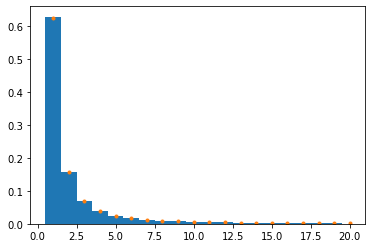

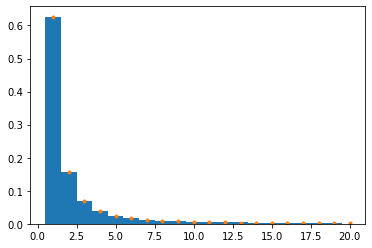

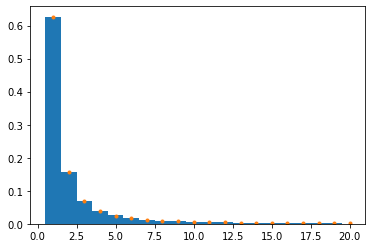

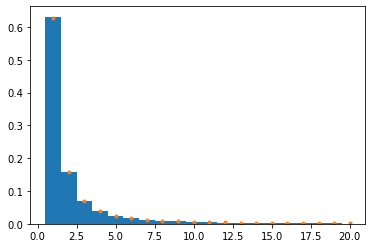

In [40]:
M = 20
a = 2
ps = [k/5 for k in range(1, 5)]
n = int(10e5)
Z = np.sum([1/(k**a) for k in range(1, 21)])
lin = np.linspace(1, 20, 20)
f = lambda x: 1/(x**a * Z)

for p in ps:
    y = Zipf1(M, p, n, alpha = a)
    plt.hist(y, bins= range(1, M+1), density=True, align="left")
    plt.plot(lin, [f(l) for l in lin], '.')
    plt.show()

In [43]:
from math import sqrt
from scipy.stats import norm

def Zipf_cont(f, sigma2, y0, n = 10**4):
    def Bernoulli(prob):
        return rand() <= prob
    t = 0
    y = np.empty(n)
    y[0] = y0
    while t < n-1:
        proposal = np.random.normal(y[t], sqrt(sigma2))
        accept_prob = min(f(proposal)* norm.pdf(y[t], proposal, sqrt(sigma2))/\
                        (f(y[t])* norm.pdf(proposal, y[t], sqrt(sigma2))), 1)
        if Bernoulli(accept_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]
        t += 1
    return y

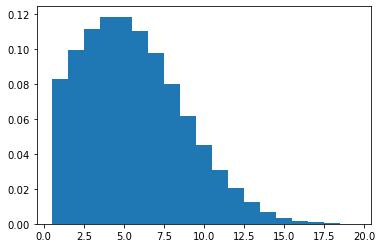

In [44]:
f = lambda s: 4*np.exp(-(s+3)**2 /4) + 6*np.exp(-(s-5)**2 /32)
sigma2 = 1
y0 = 5
n = int(10e5)

y = Zipf_cont(f, sigma2, y0, n = n)

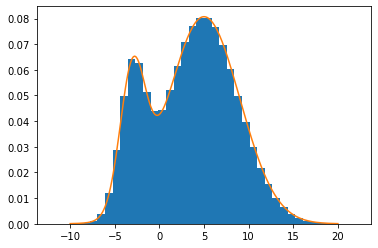

In [73]:
from scipy.integrate import quad
lin = np.linspace(-10, 20, 200)
Z = quad(f, -np.inf, np.inf)[0]
plt.hist(y, bins= 40, density=True, align="mid")
plt.plot(lin, [f(l)/Z for l in lin])
plt.show()

In [59]:
print([s for s in Zipf_cont(f, sigma2, y0, n = 100) if s < 0])

[-0.3430649840886042, -0.8970918727963537, -0.43037800154700817, -1.381537834562478, -2.503895242210782, -3.28904876961545, -3.28904876961545, -3.5559839654992844, -2.9560933573762744, -2.05799547829902, -0.7547435597576053, -0.6415049307521594, -0.6940640293560527, -2.2903190480194686, -2.863964311357353, -3.334029857710147, -3.5439533223751987, -3.5439533223751987, -3.9713870314015245, -4.5197711365836195, -3.890689827103823, -5.069551943386956, -5.069551943386956, -6.050058416333846, -5.785595512254249, -5.1514674150655715, -5.4907264573601875, -5.4907264573601875, -4.480303846415265]


In [89]:
from math import sqrt
from scipy.stats import norm
import random

def Zipf_cont2(f, L, y0, n = 10**4):
    def Bernoulli(prob):
        return rand() <= prob
    t = 0
    y = np.empty(n)
    y[0] = y0
    while t < n-1:
        proposal = y[t] + random.random() * L * (-1)**(Bernoulli(0.5))
        accept_prob = min(f(proposal)/(f(y[t])), 1)
        if Bernoulli(accept_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]
        t += 1
    return y

In [90]:
f = lambda s: 4*np.exp(-(s+3)**2 /4) + 6*np.exp(-(s-5)**2 /32)
sigma2 = 1
y0 = 5
L = 1
n = int(10e5)

y = Zipf_cont2(f, L, y0, n = n)

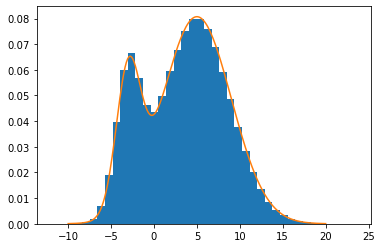

In [91]:
lin = np.linspace(-10, 20, 200)
Z = quad(f, -np.inf, np.inf)[0]
plt.hist(y, bins= 40, density=True, align="mid")
plt.plot(lin, [f(l)/Z for l in lin])
plt.show()

[  5.           5.22389915   6.6494417  ... 159.30199581 159.30199581
 159.30199581]


In [93]:
from scipy.stats import poisson

def Zipf_poisson(l, p, x0, n = 10**4):
    def Bernoulli(prob):
        return rand() <= prob
    t = 0
    y = np.empty(n)
    y[0] = x0
    while t < n-1:
        proposal = max(y[t] + (-1)**Bernoulli(1 - p), 0)
        accept_prob = 0
        if proposal < y[t]:
            accept_prob = min(poisson.pmf(proposal, l) * p / ((1 - p) * poisson.pmf(y[t], l)), 1)
        else:
            accept_prob = min(poisson.pmf(proposal, l) * (1 - p) / (p * poisson.pmf(y[t], l)), 1)
        
        if Bernoulli(accept_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]
        t += 1
    return y

In [94]:
p=0.3
x0=3
n=int(10e5)
l=4
y = Zipf_poisson(l, p, x0, n = 10**4)

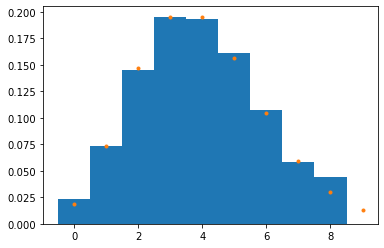

In [98]:
lin = np.linspace(0, 9, 10)
plt.hist(y, bins= range(10), density=True, align="left")
plt.plot(lin, [poisson.pmf(li, l) for li in lin], '.')
plt.show()

In [101]:
# HW 10.3
def Zipf_cont(f, sigma2, y0, n = 10**4):
    def Bernoulli(prob):
        return rand() <= prob
    t = 0
    y = np.empty(n)
    y[0] = y0
    while t < n-1:
        proposal = np.random.normal(y[t], sqrt(sigma2))
        accept_prob = min(f(proposal)* norm.pdf(y[t], proposal, sqrt(sigma2))/\
                        (f(y[t])* norm.pdf(proposal, y[t], sqrt(sigma2))), 1)
        if Bernoulli(accept_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]
        t += 1
    return y

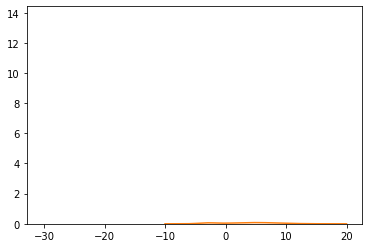

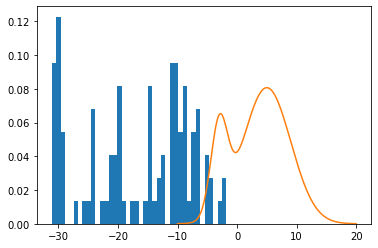

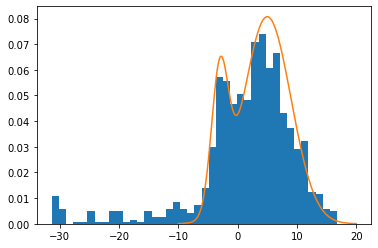

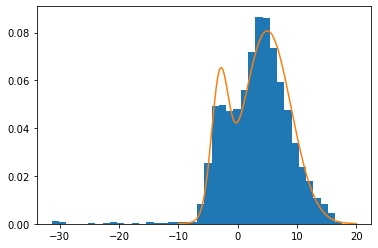

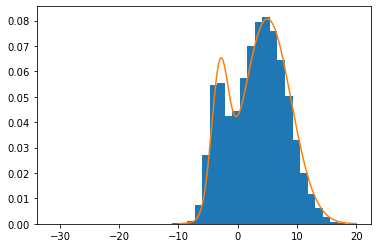

In [103]:
f = lambda s: 4*np.exp(-(s+3)**2 /4) + 6*np.exp(-(s-5)**2 /32)
Z = quad(f, -np.inf, np.inf)[0]

sigma2 = 1
y0 = -30
n = int(10e5)

y = Zipf_cont(f, sigma2, y0, n = n)

lin = np.linspace(-10, 20, 200)

for k in range(1, 6):    
    plt.hist(y[:10**k], bins= 40, density=True, align="left")
    plt.plot(lin, [f(l)/Z for l in lin])
    plt.show()

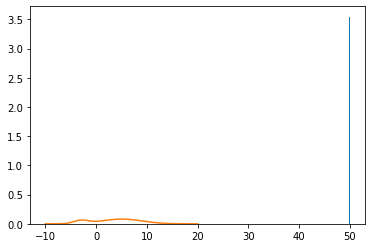

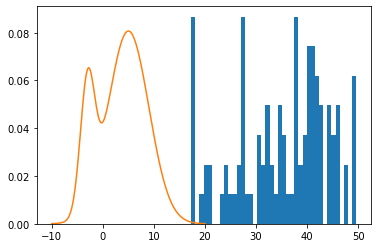

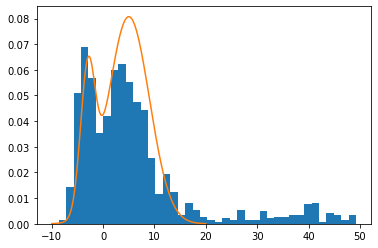

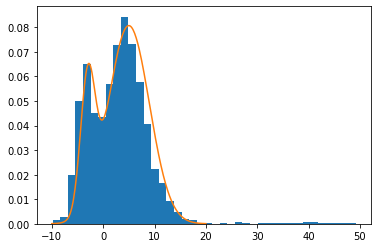

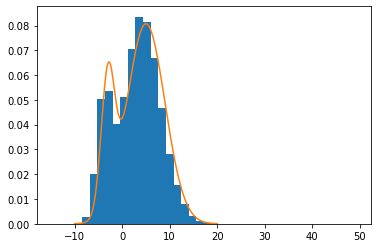

In [104]:
y0 = 50
y = Zipf_cont(f, sigma2, y0, n = n)

lin = np.linspace(-10, 20, 200)

for k in range(1, 6):    
    plt.hist(y[:10**k], bins= 40, density=True, align="left")
    plt.plot(lin, [f(l)/Z for l in lin])
    plt.show()

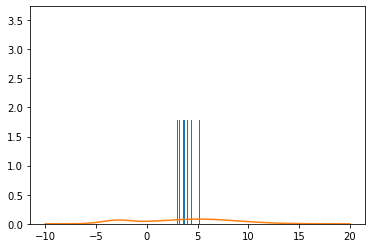

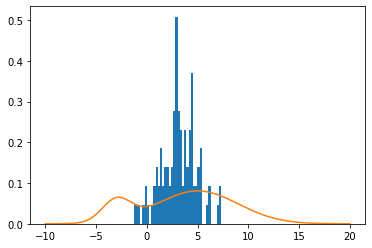

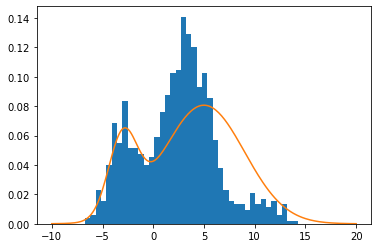

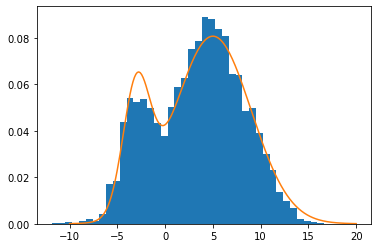

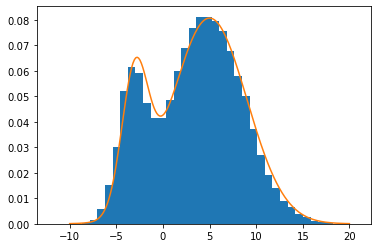

In [105]:
y0 = 3
y = Zipf_cont(f, sigma2, y0, n = n)

lin = np.linspace(-10, 20, 200)

for k in range(1, 6):    
    plt.hist(y[:10**k], bins= 40, density=True, align="left")
    plt.plot(lin, [f(l)/Z for l in lin])
    plt.show()

In [129]:
def metrop_burnin(f, sigma2, y0, B, n = 10**4):
    def Bernoulli(prob):
        return rand() <= prob
    t = 0

    y = np.empty(n + B)
    y[0] = y0
    while t < (n-1 + B):
        proposal = np.random.normal(y[t], sqrt(sigma2))
        accept_prob = min(f(proposal)* norm.pdf(y[t], proposal, sqrt(sigma2))/\
                        (f(y[t])* norm.pdf(proposal, y[t], sqrt(sigma2))), 1)
        if Bernoulli(accept_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]
        t += 1
    return y[B:]

Starting point = -10


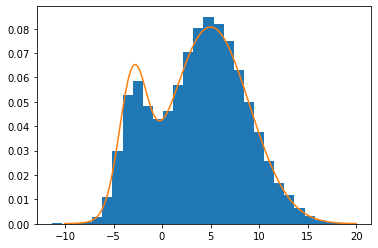

Starting point = -9


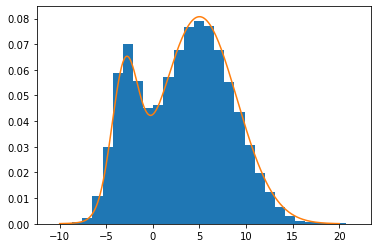

Starting point = -8


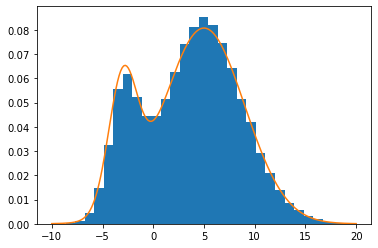

Starting point = -7


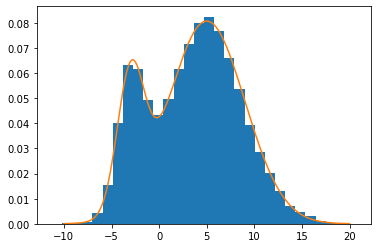

Starting point = -6


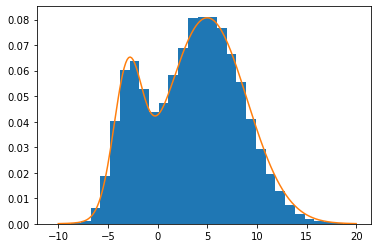

Starting point = -5


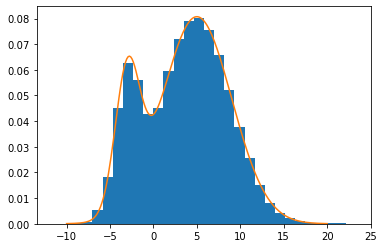

Starting point = -4


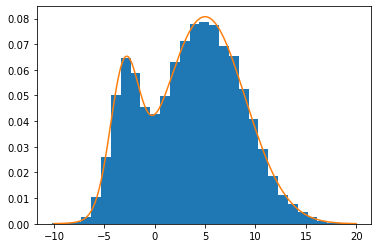

Starting point = -3


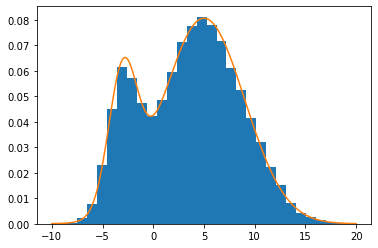

Starting point = -2


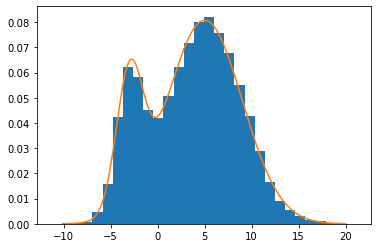

Starting point = -1


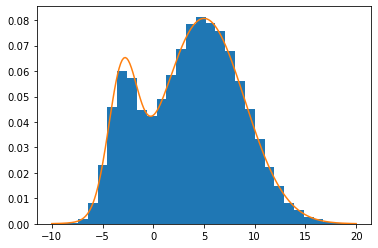

Starting point = 0


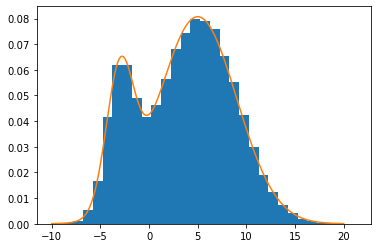

Starting point = 1


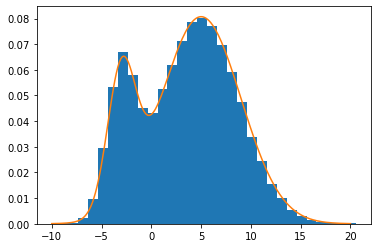

Starting point = 2


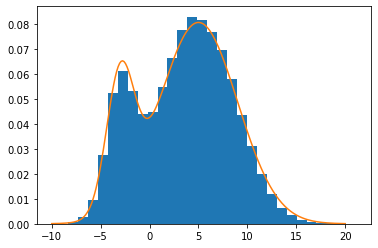

Starting point = 3


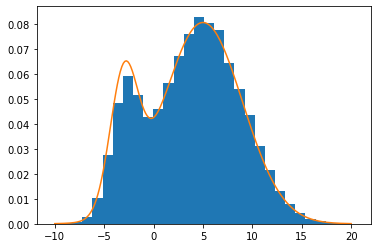

Starting point = 4


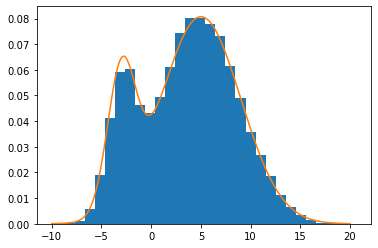

Starting point = 5


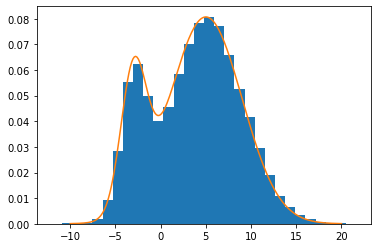

Starting point = 6


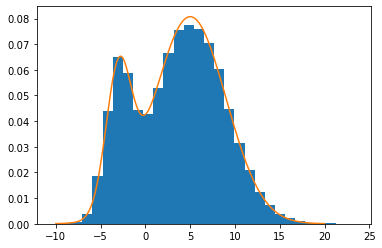

Starting point = 7


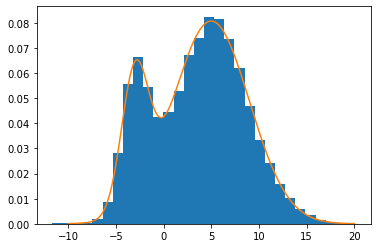

Starting point = 8


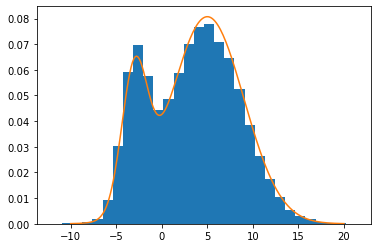

Starting point = 9


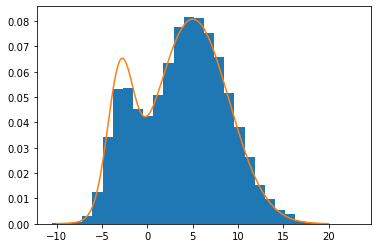

Starting point = 10


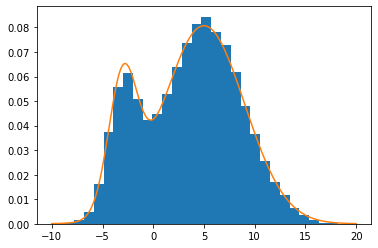

In [119]:
B = int(10e4)
n = int(10e4)

for x0 in range(-10, 11):
    print("Starting point = " + str(x0))
    y = y = metrop_burnin(f, sigma2, x0, B, n = n)

    plt.hist(y, bins= 30, density=True, align="mid")
    plt.plot(lin, [f(l)/Z for l in lin])
    plt.show()

In [130]:
def metrop_burnin_unif(f, sigma2, y0, B, L=1, n = 10**4):
    def Bernoulli(prob):
        return rand() <= prob
    t = 0

    y = np.empty(n + B)
    y[0] = y0
    while t < (n-1 + B):
        proposal = y[t] + random.random() * (-1)**(Bernoulli(0.5)) * L
        accept_prob = min(f(proposal)/(f(y[t])), 1)
        if Bernoulli(accept_prob):
            y[t+1] = proposal
        else:
            y[t+1] = y[t]
        t += 1
    return y[B:]

Starting point = -10


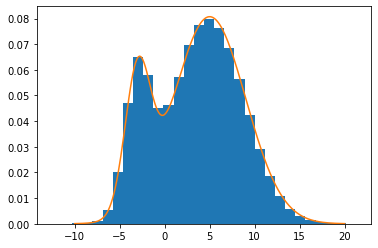

Starting point = -9


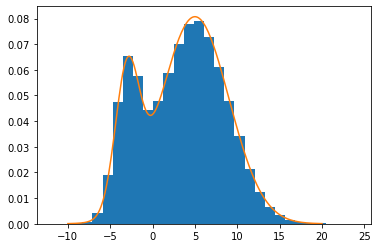

Starting point = -8


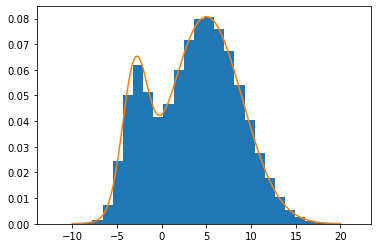

Starting point = -7


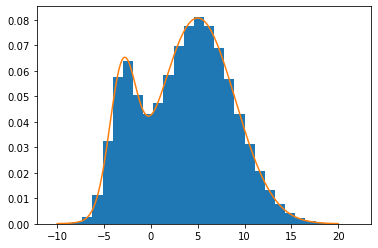

Starting point = -6


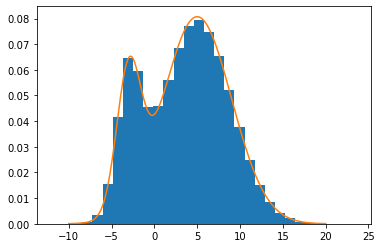

Starting point = -5


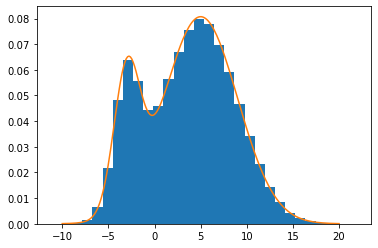

Starting point = -4


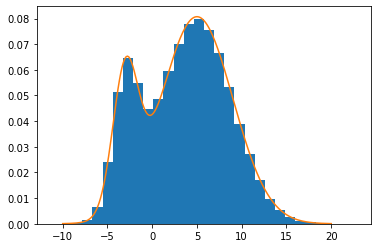

Starting point = -3


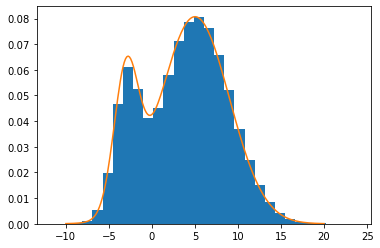

Starting point = -2


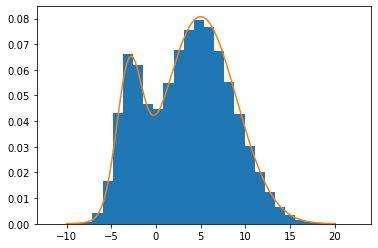

Starting point = -1


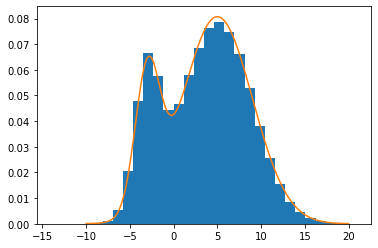

Starting point = 0


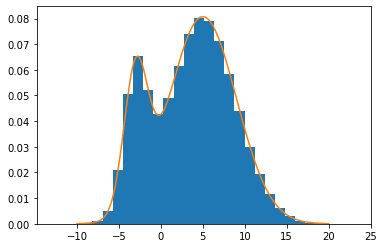

Starting point = 1


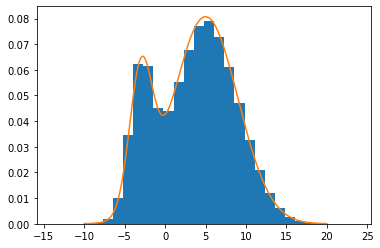

Starting point = 2


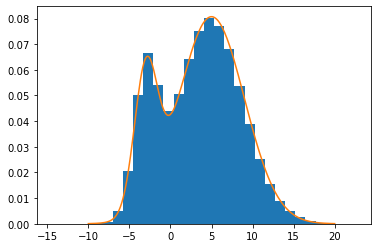

Starting point = 3


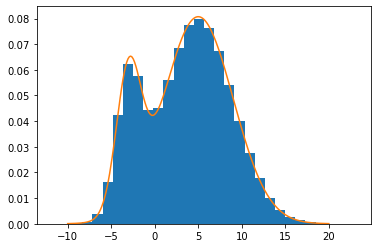

Starting point = 4


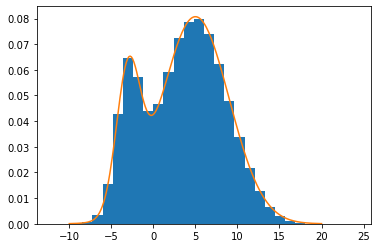

Starting point = 5


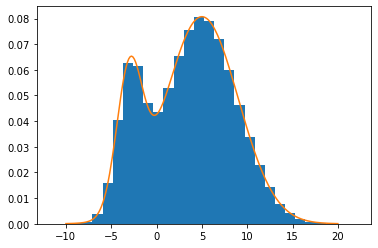

Starting point = 6


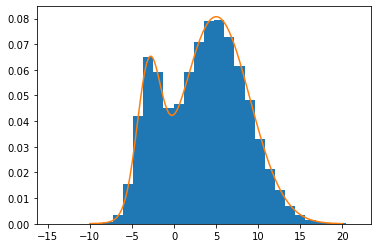

Starting point = 7


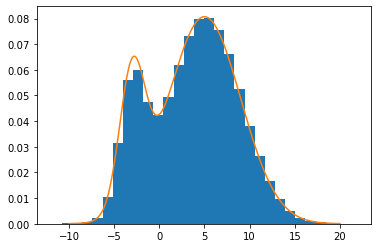

Starting point = 8


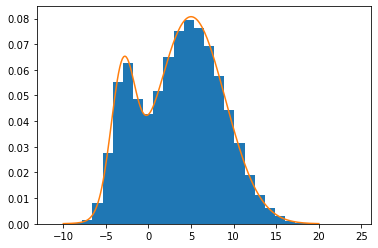

Starting point = 9


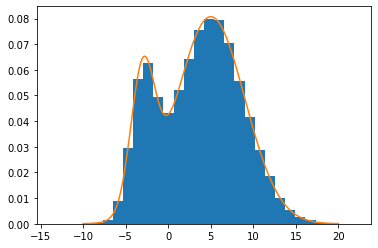

Starting point = 10


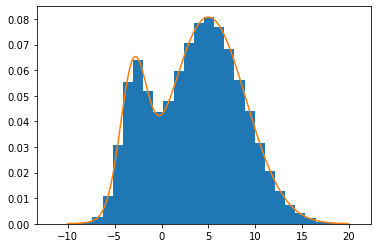

In [132]:
for x0 in range(-10, 11):
    print("Starting point = " + str(x0))
    y = y = metrop_burnin_unif(f, sigma2, x0, B, n = int(10e5))

    plt.hist(y, bins= 30, density=True, align="mid")
    plt.plot(lin, [f(l)/Z for l in lin])
    plt.show()

In [191]:
def gibbs(f, mean, var, y0=np.array([0,0]), L=1, n = 10**5):
    def Bernoulli(prob):
        return rand() <= prob
    t = 0

    y = np.transpose(np.vstack((np.zeros(n), np.zeros(n))))
    y[0, :] = y0
    while t < (n - 1):
        d = random.randint(0, 1)
        y[t + 1, :] = y[t, :]
        proposal = np.random.normal(mean(y[t, :][(d + 1) % 2]), sqrt(var(y[t, :][(d + 1) % 2])))
        # f(y[t, :][0], y[t, :][1])
        y[t + 1, :][d] += proposal
        t += 1
    return y

In [192]:
f = lambda x, y: np.exp((-x**2 * y**2 + x**2 + y**2 - 8*x - 8*y)/2)
mean = lambda y: 4/(1 + y**2)
var = lambda y: mean(y) / 4

sample = gibbs(f, mean, var)
print(sample)

[[0.00000000e+00 0.00000000e+00]
 [5.70578866e+00 0.00000000e+00]
 [5.70578866e+00 1.50196655e-01]
 ...
 [1.92739192e+05 1.76393988e-01]
 [1.92739192e+05 1.76397767e-01]
 [1.92739192e+05 1.76402019e-01]]


192739.1923416759
0.3022542414256374


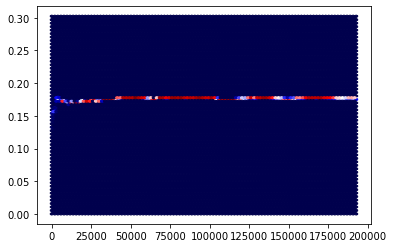

In [193]:
print(max(sample[:, 0]))
print(max(sample[:, 1]))
plt.hexbin(sample[:, 0], sample[:, 1], gridsize=100, cmap='seismic')
plt.show()